## Live In Your Style Demo
This demo will demostrate the steps to run deeplab semantic segmentation model and style transfer model on sample input images.



In [1]:
#@title Imports

import cv2
import sys
import numpy as np
import tensorflow as tf
from PIL import Image
import time
import matplotlib.pyplot as plt
from matplotlib import gridspec

from Segmentation.DeepLabModels import DeepLabModel
from StyleTransfer.StyleModel import StyleModel


In [2]:
# initial segmentation model and style transfer model

MODEL_FILE = "Segmentation/models/deeplab_dm0.5_multi-scale_inference.pb"
DEVICE_TYPE = "/gpu:0"
SEG_MODEL = DeepLabModel(MODEL_FILE, DEVICE_TYPE)

styles = ["LIYS_candy", "LIYS_cubist", "LIYS_denoised_starry",
          "LIYS_feathers", "LIYS_mosaic", "LIYS_scream", "LIYS_wave"]

style = styles[2]

STY_MODEL = StyleModel("StyleTransfer/models/" + style + ".pb",
                       resize_ratio=0.6,
                       device_t=DEVICE_TYPE)


height, width, channels: (427, 640, 3)


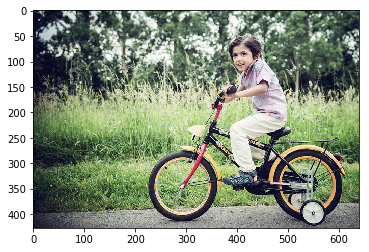

In [3]:
# input image

img_path = 'examples/image1.jpg'
img = cv2.imread(img_path,cv2.IMREAD_COLOR)
height, width, channels = img.shape
print("height, width, channels: "+str(img.shape))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)


Segment image

segmentation inference size: (342, 513)
Time elapsed 2295.67 ms


Text(0.5,1,'segmentation overlay')

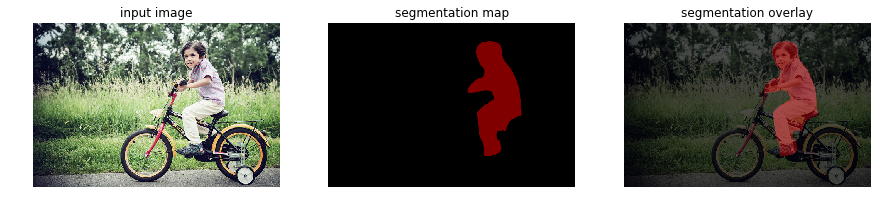

In [4]:

# RGB
color_map = np.array([[0, 0, 0],
                     [128, 0, 0]], dtype=np.uint8)

frameTimestamp = time.time()

_, seg_map = SEG_MODEL.run(img_rgb)
print("segmentation inference size: " + str(seg_map.shape))
seg_mask = color_map[seg_map]
seg_mask = cv2.resize(seg_mask, (width, height),
                             interpolation=cv2.INTER_LINEAR)

print("Time elapsed {:.2f} ms".format((time.time() - frameTimestamp) * 1000.))

plt.figure(figsize=(15, 5))
grid_spec = gridspec.GridSpec(1, 3, width_ratios=[6, 6, 6])

plt.subplot(grid_spec[0])
plt.imshow(img_rgb)
plt.axis('off')
plt.title('input image')

plt.subplot(grid_spec[1])
plt.imshow(seg_mask)
plt.axis('off')
plt.title('segmentation map')

plt.subplot(grid_spec[2])
plt.imshow(img_rgb)
plt.imshow(seg_mask, alpha=0.7)
plt.axis('off')
plt.title('segmentation overlay')


Style Transfer image

stylization inference size: (256, 384, 3)
Time elapsed 2514.60 ms


Text(0.5,1,'style image')

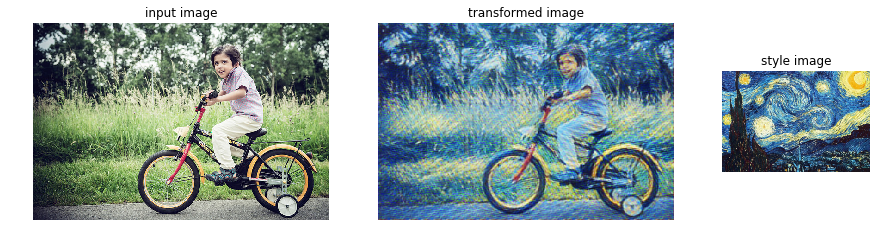

In [5]:
frameTimestamp = time.time()

styledImage = STY_MODEL.run(img_rgb)
print("stylization inference size: " + str(styledImage.shape))
styledImage = cv2.resize(styledImage, (width, height),
                             interpolation=cv2.INTER_LINEAR)

print("Time elapsed {:.2f} ms".format((time.time() - frameTimestamp) * 1000.))

plt.figure(figsize=(15, 5))
grid_spec = gridspec.GridSpec(1, 3, width_ratios=[6, 6, 3])

plt.subplot(grid_spec[0])
plt.imshow(img_rgb)
plt.axis('off')
plt.title('input image')

plt.subplot(grid_spec[1])
plt.imshow(styledImage)
plt.axis('off')
plt.title('transformed image')

plt.subplot(grid_spec[2])
plt.imshow(cv2.cvtColor(cv2.imread("StyleTransfer/models/" + style + ".jpg",cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('style image')


Transform LIYS image

style transfer cost: 2074.21 ms
segmentation cost: 1192.84 ms
Merge cost: 3.60 ms


Text(0.5,1,'style image')

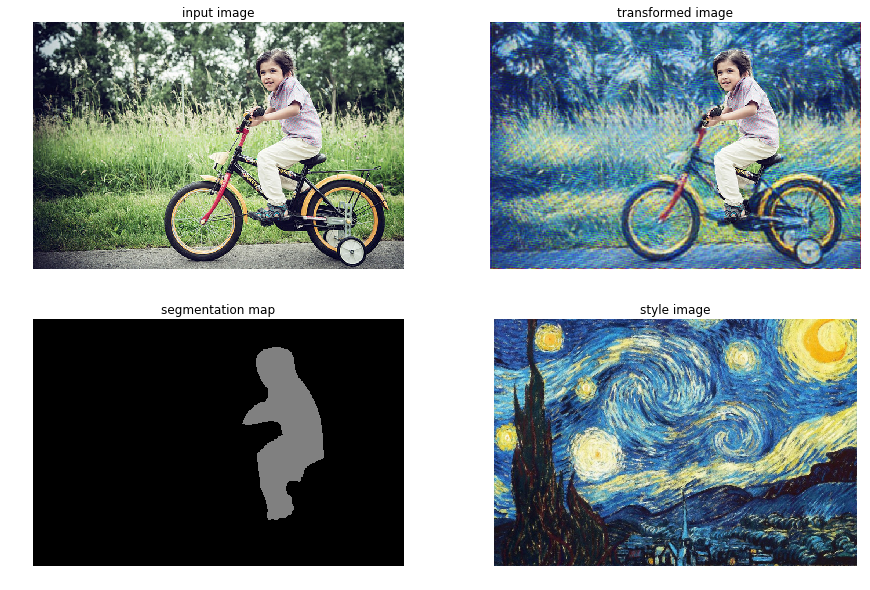

In [6]:
frameTimestamp = time.time()

styStart = time.time()
styledImage = STY_MODEL.run(img_rgb)
styledImage = cv2.resize(styledImage, (width, height), interpolation=cv2.INTER_LINEAR)

styEnd = time.time()
print("style transfer cost: {:.2f} ms".format((styEnd - styStart) * 1000.))

segStart = time.time()

_, seg_map = SEG_MODEL.run(img_rgb)
seg_map = np.array([[0, 0, 0],
                        [1, 1, 1]], dtype=np.uint8)[seg_map]

seg_map = cv2.resize(seg_map, (width, height), interpolation=cv2.INTER_NEAREST)

segEnd = time.time()
print("segmentation cost: {:.2f} ms".format((segEnd - segStart) * 1000.))

Mergestart = time.time()
liys_img = img_rgb * seg_map + styledImage * (1 - seg_map)
print("Merge cost: {:.2f} ms".format((time.time() - Mergestart) * 1000.))
    
liys_img= Image.fromarray(liys_img)

plt.figure(figsize=(15, 10))
grid_spec = gridspec.GridSpec(2, 2, width_ratios=[6, 6])

plt.subplot(grid_spec[0])
plt.imshow(img_rgb)
plt.axis('off')
plt.title('input image')

plt.subplot(grid_spec[1])
plt.imshow(liys_img)
plt.axis('off')
plt.title('transformed image')

plt.subplot(grid_spec[2])
plt.imshow(seg_map * 128)
plt.axis('off')
plt.title('segmentation map')

plt.subplot(grid_spec[3])
plt.imshow(cv2.cvtColor(cv2.imread("StyleTransfer/models/" + style + ".jpg",cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('style image')
